## Observations 
available:
| Dataset    | variables   | ESMValTool-find |
|:------------|:-------------|:--------------------|
|ERA-Interim | sst(tos, Omon)(ts, Amon), pr, taux(tauu) |OBS6, reanaly, tier3 |
|NOAA-CIRES-20CR-V2     |prw,  |OBS6, Tier2 |
|HadISST     |tos/ts,   |OBS, Tier2 |
|NOAA-ERSSTv5|tos      |OBS6, Tier2 |
|NCEP-NCAR-R1|ts, pr   |OBS6, Tier2 |
|NCEP        |pr     |OBS, Tier2 |
|GPCP-SG     |pr,    |OBS, Tier2 |

Need to get:
- TropFlux - sst, taux (https://incois.gov.in/tropflux/DataHome.jsp)
- CMAP - pr (https://psl.noaa.gov/data/gridded/data.cmap.html)

In [1]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset

CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

obs = Dataset(dataset= 'ERA-Interim', project= 'OBS6', 
              type= 'reanaly', version='1', 
              timerange='1979/2018', tier='3', 
              mip='Omon', short_name='ts')

print(len(obs.files))
list(obs.from_files())
# obs.find_files(), obs.files

0


[Dataset:
 {'dataset': 'ERA-Interim',
  'project': 'OBS6',
  'mip': 'Omon',
  'short_name': 'ts',
  'frequency': 'mon',
  'long_name': 'Surface Temperature',
  'modeling_realm': ['atmos'],
  'original_short_name': 'ts',
  'standard_name': 'surface_temperature',
  'tier': '3',
  'timerange': '1979/2018',
  'type': 'reanaly',
  'units': 'K',
  'version': '1'}
 session: 'session-ef9ba2fe-c08f-481a-a0ac-67187eddfb4a_20241001_043535']

In [4]:
from esmvalcore.config import CFG
CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')
from esmvalcore.dataset import Dataset
obs_sst = Dataset(dataset= 'NOAA-ERSSTv5', 
                 project= 'OBS6', 
                 type= '*', 
                 version='*' , 
                 timerange = '1970/2018', 
                 tier='*', 
                 mip='*', 
                 short_name='tos')

obs_sst.find_files()
obs_sst.files

# list(obs_sst.from_files())

[LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_185401-200712.nc'),
 LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_200801-202001.nc')]

In [1]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset

CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

In [2]:
CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937"]
CFG['rootpath']['OBS6']

['/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937']

In [3]:
# obs = Dataset(dataset= 'ensda-v351', project= 'CREATE-IP', 
#               type= 'reanalysis', version='*', 
#               timerange='*', institute='NOAA-ESRLandCIRES', 
#               mip='Amon', short_name='tas')


obs = Dataset(dataset='*',project= 'OBS6', mip= 'Amon', tier='*', #'NOAA-CIRES-20CR-V2'
         type= 'reanaly', version= '*', start_year= '1910', end_year= '2012', short_name='pr') #pr, tauu, tauv
print(len(obs.files))
list(obs.from_files())

# obs.find_files(), obs.files
for obs_ds in list(obs.from_files()):
    obs_ds['tier'] = obs_ds['tier'][-1]
    # print(obs_ds['tier'][-1],obs_ds.load())


167


In [9]:
%%time
import iris
import cartopy.crs as ccrs
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from esmvalcore.preprocessor import (
                regrid,
                extract_region, convert_units,
                climate_statistics, annual_statistics, area_statistics ) # month mean, standard deviation
iris.FUTURE.datum_support = True
def preproc_base(cube):
    cube = convert_units(cube, units="mm/day")
    cube = extract_region(cube, 150, 270, -25, 25)
    cube = area_statistics(cube, 'mean')
    cube = annual_statistics(cube, 'mean')
    # cube = cube.collapsed('month_number', iris.analysis.STD_DEV)

    # cube.convert_units('1e-3 N/m2')
    return cube
    
# print(obs.files)
preproc_1 = {}
for obs_ds in list(obs.from_files()):
    obs_ds['tier'] = obs_ds['tier'][-1]
    obs_ds['timerange'] = '1910/2010'
    cube = preproc_base(obs_ds.load())
    preproc_1[obs_ds['dataset']] = cube
    print(cube.shape)

# dataout = preproc_base(obs.load())
# dataout

/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/iris/coords.py:2140: IrisVagueMetadataWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'Number of stations'.
  warnings.warn(


(101,)
(63,)
(101,)


(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191201-191212.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191201-191

(101,)
(32,)
(32,)
CPU times: user 8.99 s, sys: 5.72 s, total: 14.7 s
Wall time: 26.8 s


CPU times: user 1min 29s, sys: 2min 6s, total: 3min 35s
Wall time: 4min 52s


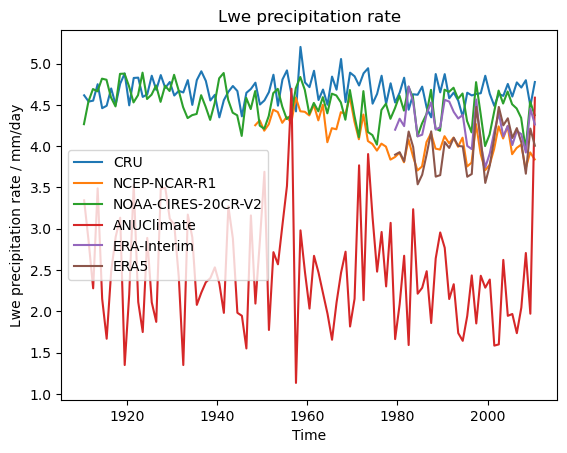

In [10]:
%%time
# qplt.contourf(preproc_1['CRU'])
for lb, cube in preproc_1.items():
    qplt.plot(cube, label=lb)

plt.legend()
# plt.coastlines()

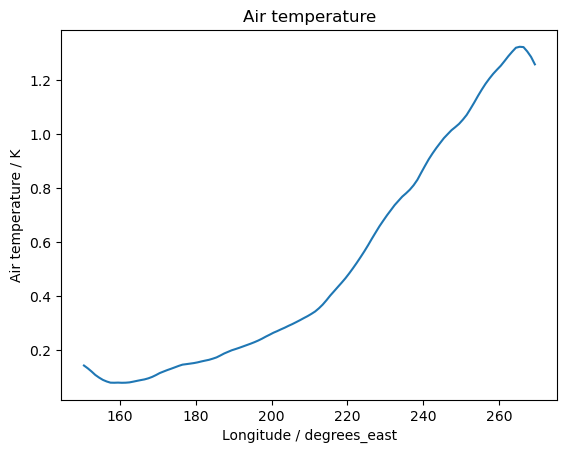

In [6]:
import cartopy.crs as ccrs
import iris.quickplot as qplt
import matplotlib.pyplot as plt

qplt.plot(dataout)